<a href="https://colab.research.google.com/github/MohsenBahaj/Deep-Learnging/blob/main/Copy_of_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Organizing Maps

## Importing the libraries

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=045da226879bef49515300256a8387871fab4a0aab62e7c93d348ee80d437326
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [6]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results

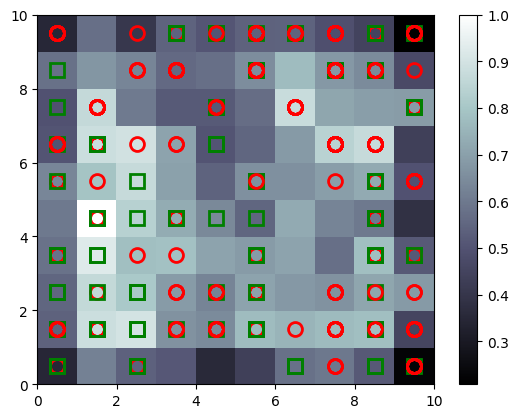

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds

In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5587297e+07 1.0000000e+00 1.8420000e+01 1.0415000e+01 1.0000000e+00
  6.0000000e+00 4.0000000e+00 1.2500000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.2000000e+02 3.7600000e+02]
 [1.5609823e+07 1.0000000e+00 2.8750000e+01 1.1650000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 5.0000000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 2.8000000e+02 1.0000000e+00]
 [1.5594133e+07 1.0000000e+00 4.8330000e+01 1.2000000e+01 2.0000000e+00
  7.0000000e+00 4.0000000e+00 1.6000000e+01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.1000000e+02 1.0000000e+00]
 [1.5706268e+07 1.0000000e+00 2.3250000e+01 1.0000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 8.3500000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 3.0000000e+02 1.0000000e+00]
 [1.5653147e+07 1.0000000e+00 1.6250000e+01 8.3500000e-01 2.0000000e+00
  7.0000000e+00 4.0000000e+00 8.5000000e-02 1.0000000e+00 0.